### Mapping Molecular Hamiltonians To Qubit Operators with Jordan-Wigner Transformation

In quantum computing, the efficient mapping of molecular Hamiltonians to qubit operators is a critical step in solving electronic structure problems, especially in quantum chemistry. One of the most established methods for achieving this is the **Jordan-Wigner Transformation (JWT)**. The JWT translates fermionic operators, which describe the behavior of electrons in molecules, into qubit operators that can be used in quantum algorithms. 

The central challenge in electronic structure calculations is the fermionic nature of electrons, which obey the Pauli exclusion principle and anti-commutation relations. Fermionic operators are used to create and annihilate electrons in specific quantum states, but these operators do not directly translate to qubit-based quantum computing. This is where JWT comes in: it provides a systematic way to represent these fermionic operators as qubit operators that obey the commutation relations of quantum gates.

The Jordan-Wigner Transformation maps each fermionic operator to a string of Pauli matrices on qubits. Specifically, each fermionic creation or annihilation operator is mapped to a combination of Pauli-Z, Pauli-X, and Pauli-Y operators that span the qubits, ensuring that the anti-commutation properties of fermions are preserved in the qubit space. 

For example, a fermionic creation operator $c^\dagger_i$ , which adds an electron to the $i $-th quantum state, can be mapped as:
$$
c^\dagger_i = \frac{1}{2}(X_i - iY_i) \prod_{j=0}^{i-1} Z_j
$$
Here, $X$, $Y$, and $Z$ are Pauli matrices, and the string of $Z_j$ operators accounts for the anti-commutation relations between different fermionic modes. 

By mapping molecular Hamiltonians using the Jordan-Wigner Transformation, we can represent the electronic interactions and energy of a molecule in a form that quantum computers can process. Once this mapping is complete, variational algorithms like the **Variational Quantum Eigensolver (VQE)** or **Quantum Phase Estimation (QPE)** can be employed to estimate the ground-state energy of the molecule. These algorithms aim to find the eigenvalues of the molecular Hamiltonian, which directly correspond to the molecular energy levels.

The benefit of using JWT is that it scales linearly with the number of qubits, making it an efficient method for near-term quantum devices. However, it has some limitations, such as the need for long-range qubit interactions, which may pose a challenge for hardware implementations. Other transformations, like the **Bravyi-Kitaev Transformation**, offer alternatives with different trade-offs in qubit connectivity and operator complexity. 

The Jordan-Wigner Transformation is foundational in quantum chemistry simulations on quantum computers. It bridges the gap between the fermionic nature of molecules and the qubit-based framework of quantum computing. As the field progresses, leveraging such transformations is essential for advancing quantum simulations of complex molecular systems, which could lead to breakthroughs in fields like drug discovery, material science, and energy research. 

While the JWT is a critical tool today, improvements in hardware and algorithms could lead to new methods of mapping fermionic systems to qubits that are even more efficient. Researchers are continuously exploring ways to optimize these mappings, reduce qubit requirements, and enhance the accuracy of quantum simulations. With advancements in both quantum hardware and software, we expect more powerful and scalable solutions for molecular simulations in the near future.

The **Jordan-Wigner Transformation** plays a vital role in the process of translating molecular problems into qubit space, enabling the application of quantum algorithms to solve real-world chemical problems. It remains a key component of the quantum chemistry toolkit, paving the way for new discoveries in the molecular sciences.

In [1]:
# Importing necessary Qiskit libraries
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_state_qsphere, plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Create the quantum circuit
n_qubits = 4  # Define number of qubits
qc = QuantumCircuit(n_qubits)

In [3]:
# Apply a series of gates (advanced entanglement and variational layers)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.ry(0.7, 2)
qc.rz(0.8, 1)
qc.cx(2, 3)
qc.ry(0.5, 3)

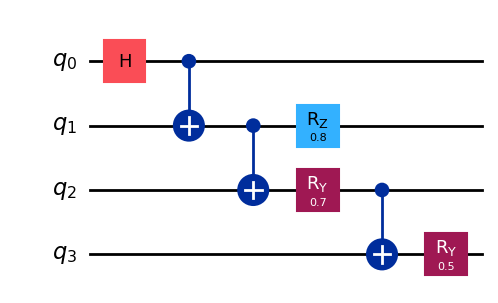

In [4]:
# Draw the advanced circuit (before adding measurements)
qc.draw(output='mpl')  # Circuit visualization in MPL
plt.show()

In [5]:
# Simulate the statevector using AerSimulator
simulator = AerSimulator()
state = Statevector.from_instruction(qc)

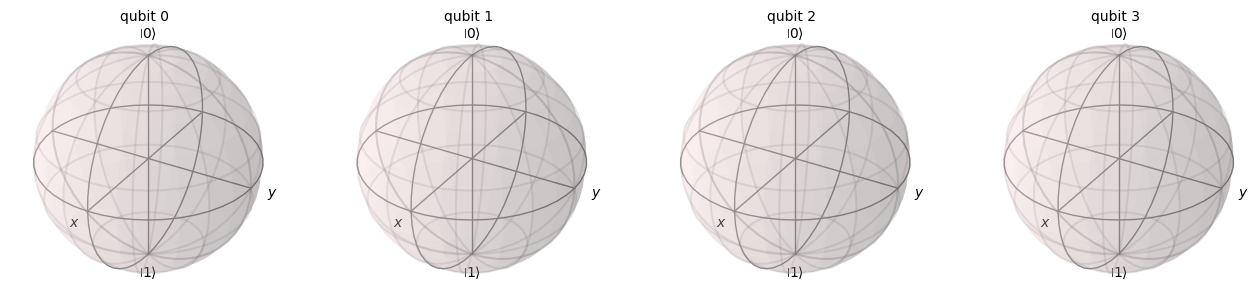

In [6]:
# Generate the visualizations (before measurement) 
plot_bloch_multivector(state)
plt.show()

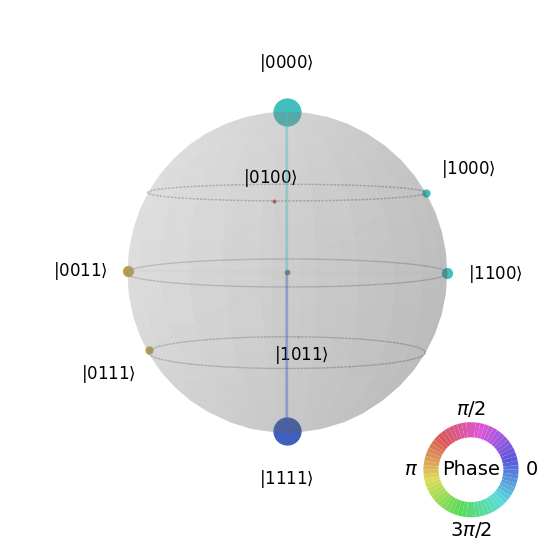

In [7]:
# QSphere visualization: Quantum state represented on the QSphere
plot_state_qsphere(state)
plt.show()

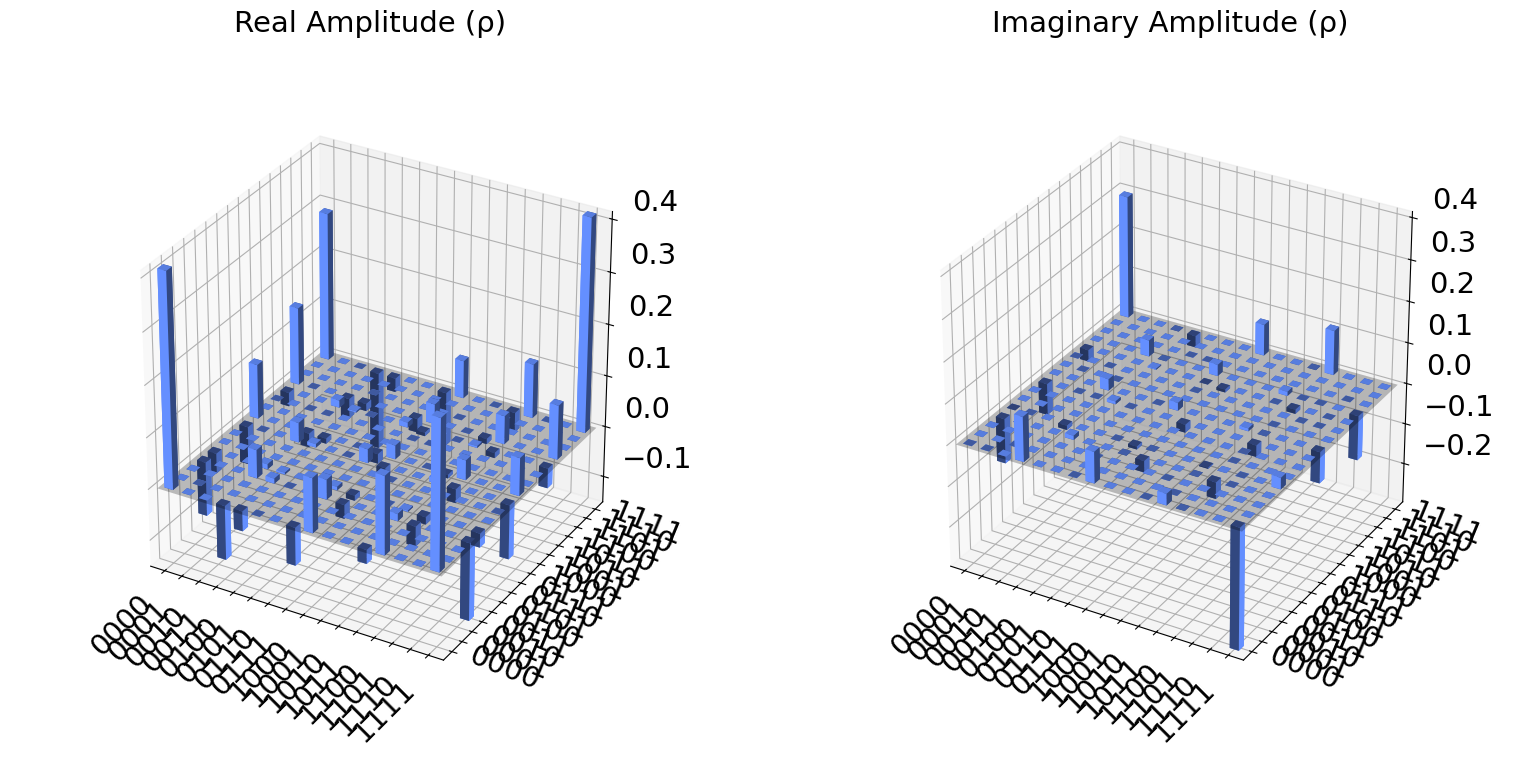

In [8]:
#  State city visualization: 3D representation of the quantum state's density matrix
plot_state_city(state)
plt.show()

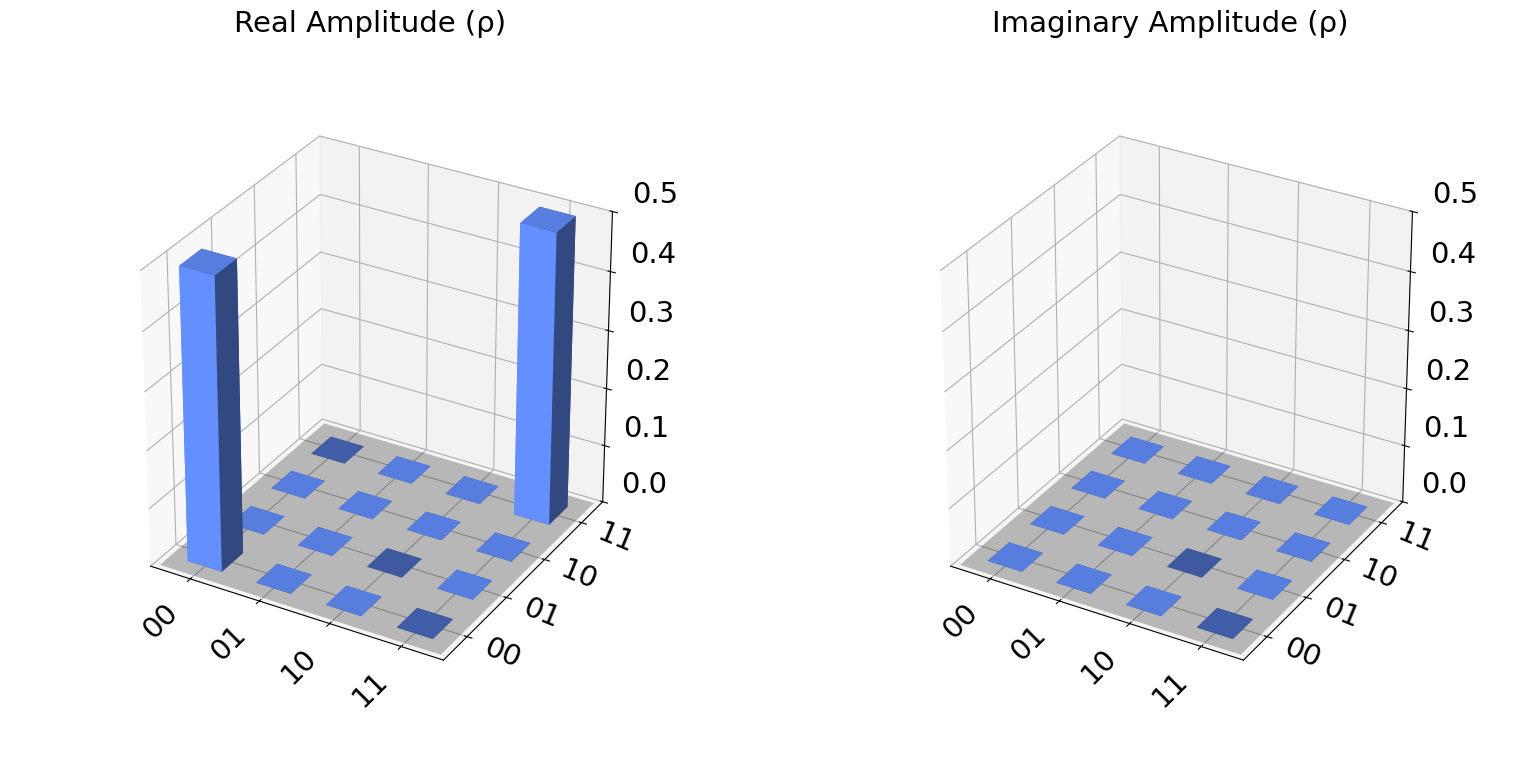

In [9]:
# Partial trace: Look at the reduced density matrix for two qubits
rho = partial_trace(state, [2, 3])  # Trace out qubits 2 and 3
plot_state_city(rho)  # Visualize the partial trace result
plt.show()

In [10]:
# Now apply measurements to all qubits
qc.measure_all()

In [11]:
# Simulate the measurement using AerSimulator
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()

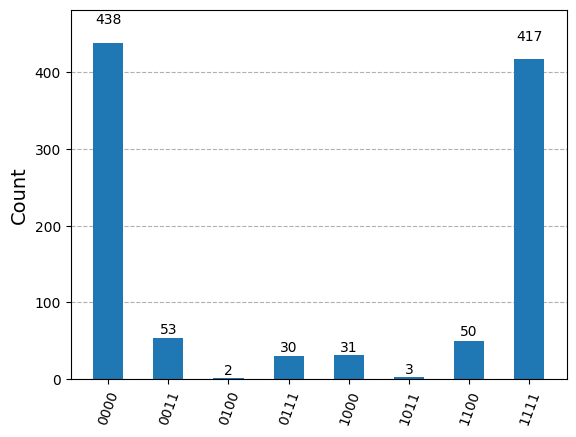

In [12]:
# Histogram: Visualization of the measurement outcomes
plot_histogram(counts)
plt.show()

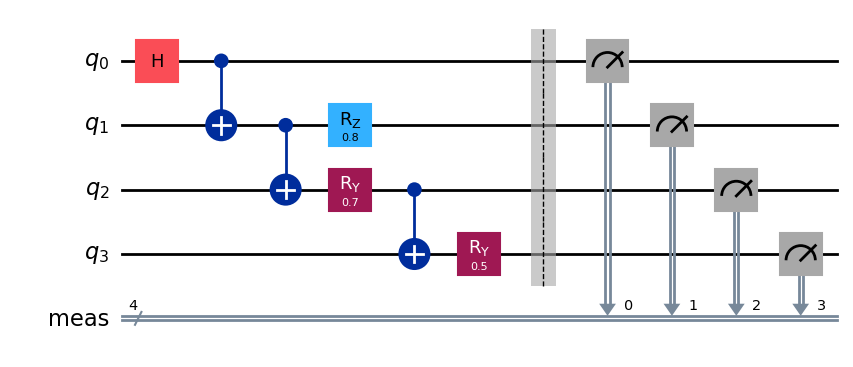

In [13]:
# Draw the advanced circuit (after adding measurements)
qc.draw(output='mpl')  # Circuit visualization in MPL
plt.show()